In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
import statsmodels.formula.api as smf #to predict new data

%matplotlib inline
wg.filterwarnings('ignore')

In [19]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

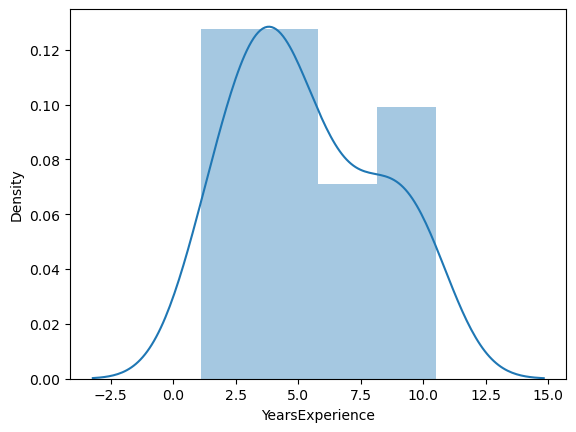

In [21]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

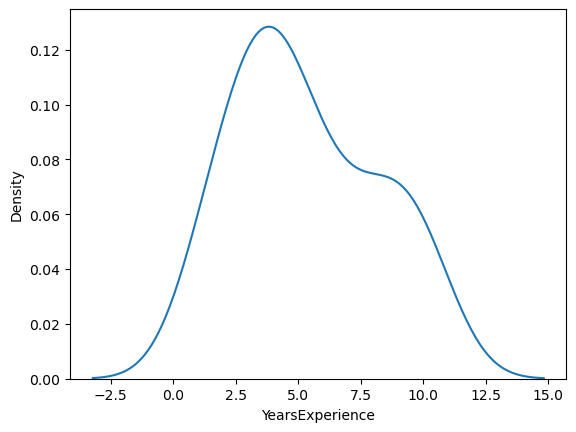

In [22]:
sns.kdeplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

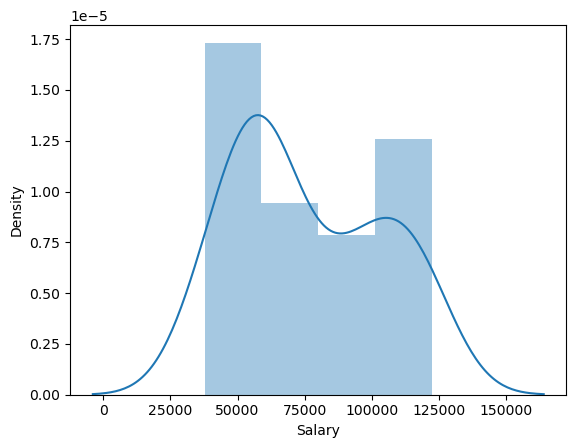

In [25]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

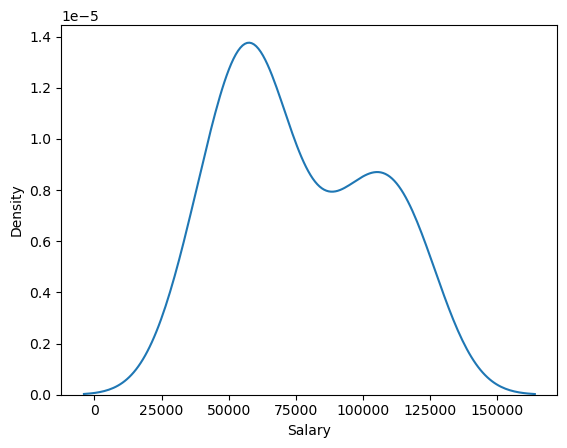

In [26]:
sns.kdeplot(df['Salary'])

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

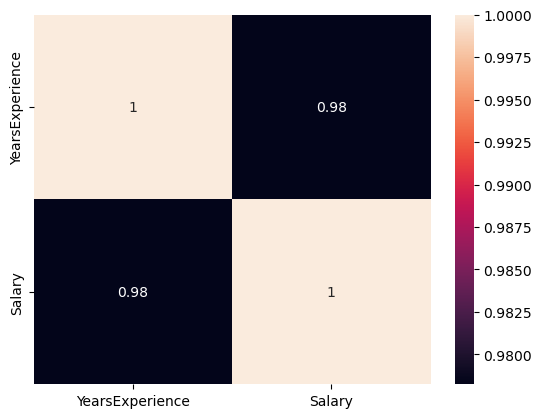

In [16]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

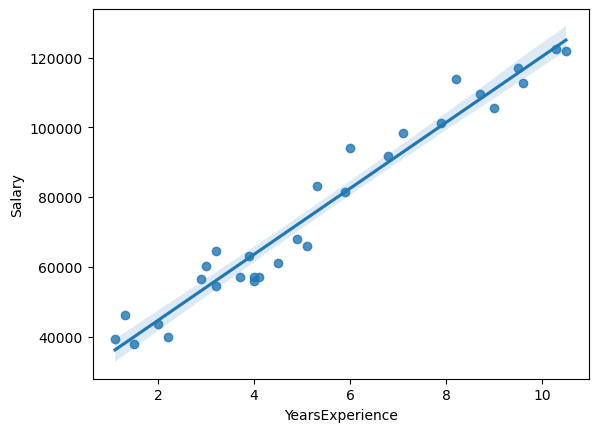

In [27]:
sns.regplot(df['YearsExperience'],df['Salary'])

In [35]:
model=smf.ols('Salary~YearsExperience',data=df).fit()
model

In [36]:
model.params #Finding corfficient parameter

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [47]:
print(f't-Value:\n{model.tvalues}\n\np-Value:\n{model.pvalues}')

t-Value:
Intercept          11.346940
YearsExperience    24.950094
dtype: float64

p-Value:
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [50]:
print(f'r-squared Value: {model.rsquared}\n\nadj-r-squared Value: {model.rsquared_adj}')

r-squared Value: 0.9569566641435086

adj-r-squared Value: 0.9554194021486339


# Model Prediction

In [62]:
#Year OF Exp:3,7 then Salary?
dfNew=pd.Series([3,7])
df1=pd.DataFrame(dfNew,columns=['YearsExperience'])
df1

,YearsExperience
0,3
1,7


In [63]:
model.predict(df1)

0    54142.087163
1    91941.936449
dtype: float64